In [29]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks

In [30]:
dataDir= '/Users/jangbaekwon/Desktop/Inha/nonmun/'

In [31]:
with open(dataDir + 'shipsnet.json') as f:
    test = json.load(f)

In [32]:
type(test)

dict

In [33]:
df = pd.read_json(dataDir + 'shipsnet.json')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
data         4000 non-null object
labels       4000 non-null int64
locations    4000 non-null object
scene_ids    4000 non-null object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [35]:
dataset = df[['data', 'labels']]
dataset

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1
5,"[39, 37, 38, 38, 35, 37, 39, 37, 39, 41, 42, 4...",1
6,"[63, 60, 60, 60, 60, 60, 59, 61, 63, 60, 65, 6...",1
7,"[111, 110, 107, 107, 110, 110, 106, 106, 111, ...",1
8,"[69, 71, 72, 71, 70, 72, 73, 73, 74, 72, 70, 6...",1
9,"[89, 86, 87, 89, 87, 86, 85, 86, 87, 87, 88, 8...",1


In [36]:
len(dataset['data'].iloc[3999]) # 19200/ 3 channel = 6400 -> 80 x 80 pixels

19200

In [37]:
dataset['labels'].shape

(4000,)

In [38]:
ship_images = dataset['labels'].value_counts()[0]
no_ship_images = dataset['labels'].value_counts()[1]

print(ship_images, no_ship_images)

3000 1000


In [39]:
x = np.array(test['data']).astype('uint8')
y = np.array(test['labels']).astype('uint8')

In [40]:
x.shape

(4000, 19200)

In [41]:
x_reshape = x.reshape([-1, 3, 80, 80]).transpose([0, 2, 3, 1])

x_reshape.shape

(4000, 80, 80, 3)

In [42]:
y.shape

(4000,)

In [43]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

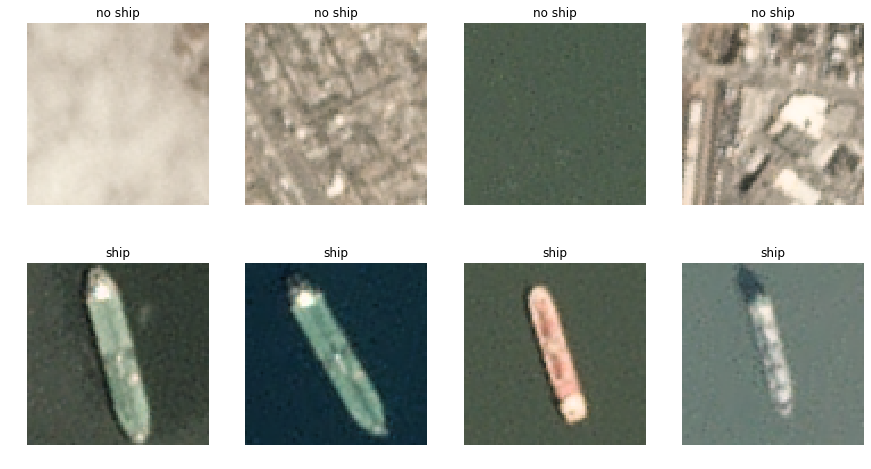

In [44]:
image_ship = x_reshape[y==1]
image_no_ship = x_reshape[y==0]

def plot(a, b):
    plt.figure(figsize=(15,15))
    
    for i, k in enumerate(range(1, 9)):
        if i <4:
            plt.subplot(2, 4, k)
            plt.title('no ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis('off')
        else:
            plt.subplot(2, 4, k)
            plt.title('ship')
            plt.imshow(image_ship[i+15])
            plt.axis('off')
            
    plt.subplots_adjust(bottom = 0.3, top = 0.7, hspace = 0.25)
    
plot(image_no_ship, image_ship)

In [45]:
x_reshape = x_reshape / 255

In [46]:
x_reshape[0][0][0]

array([0.32156863, 0.36862745, 0.31372549])

In [47]:
y_reshape = to_categorical(y)
y_reshape

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y_reshape, test_size = 0.3)

In [49]:
print(x_train.shape, y_test.shape)

(2800, 80, 80, 3) (1200, 2)


In [50]:
## modeling

model = Sequential()
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', input_shape=(80, 80, 3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(2, activation = 'sigmoid'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                331792    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [52]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = '/Users/jangbaekwon/Desktop/Inha/nonmun/best-cnn-model.hdf5'

checkpoint = callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)
early = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [53]:
history = model.fit(x_train, y_train, epochs = 50, validation_split = 0.3, verbose = 1, callbacks = [checkpoint, early])

Train on 1959 samples, validate on 841 samples
Epoch 1/50
1959/1959 [==============================] - 17s 9ms/sample - loss: 0.5529 - accuracy: 0.7458 - val_loss: 0.4007 - val_accuracy: 0.7515
Epoch 2/50
1959/1959 [==============================] - 13s 6ms/sample - loss: 0.4178 - accuracy: 0.7509 - val_loss: 0.3454 - val_accuracy: 0.7515
Epoch 3/50
1959/1959 [==============================] - 14s 7ms/sample - loss: 0.3870 - accuracy: 0.7509 - val_loss: 0.3145 - val_accuracy: 0.7515
Epoch 4/50
1959/1959 [==============================] - 14s 7ms/sample - loss: 0.3499 - accuracy: 0.7509 - val_loss: 0.2966 - val_accuracy: 0.7515
Epoch 5/50
1959/1959 [==============================] - 13s 7ms/sample - loss: 0.3514 - accuracy: 0.7509 - val_loss: 0.2857 - val_accuracy: 0.7515
Epoch 6/50
1959/1959 [==============================] - 13s 7ms/sample - loss: 0.3189 - accuracy: 0.8458 - val_loss: 0.2777 - val_accuracy: 0.9370
Epoch 7/50
1824/1959 [==========================>...] - ETA: 0s - loss:

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()